1. **Подготовка**

In [1]:
%load_ext tensorboard

!rm -r sample_data/                                                                                  
!git clone https://github.com/tensorflow/models.git                                                 

# устанавливаем Protobuf
!apt-get -qq install libprotobuf-java protobuf-compiler                                                
%cd ./models/research/
!protoc object_detection/protos/*.proto --python_out=.
%cd ../.. 

Cloning into 'models'...
remote: Enumerating objects: 30641, done.
remote: Total 30641 (delta 0), reused 0 (delta 0), pack-reused 30641
Receiving objects: 100% (30641/30641), 510.52 MiB | 35.13 MiB/s, done.
Resolving deltas: 100% (19253/19253), done.
Checking out files: 100% (3079/3079), done.
/content/models/research
/content


In [0]:
import os
os.environ['PYTHONPATH'] += ":/content/models/research/"
os.environ['PYTHONPATH'] += ":/content/models/research/slim"
os.environ['PYTHONPATH'] += ":/content/models/research/object_detection"

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
drive_file_id="1v2bzkVOt9007Js3GuIViEmr4y5ilUxSY"

training_demo_zip = drive.CreateFile({'id': drive_file_id})
training_demo_zip.GetContentFile('training_demo.zip')

!unzip training_demo.zip
!rm training_demo.zip

Archive:  training_demo.zip
   creating: training_demo/
   creating: training_demo/annotations/
  inflating: training_demo/annotations/label_map.pbtxt  
  inflating: training_demo/annotations/test.record  
  inflating: training_demo/annotations/test_labels.csv  
  inflating: training_demo/annotations/train.record  
  inflating: training_demo/annotations/train_labels.csv  
   creating: training_demo/images/
   creating: training_demo/images/test/
  inflating: training_demo/images/test/45.jpg  
  inflating: training_demo/images/test/45.xml  
  inflating: training_demo/images/test/5.jpg  
  inflating: training_demo/images/test/5.xml  
  inflating: training_demo/images/test/6.jpg  
  inflating: training_demo/images/test/6.xml  
  inflating: training_demo/images/test/67.jpg  
  inflating: training_demo/images/test/67.xml  
  inflating: training_demo/images/test/68.jpg  
  inflating: training_demo/images/test/68.xml  
  inflating: training_demo/images/test/70.jpg  
  inflating: training_demo

In [5]:
!python ./models/research/object_detection/legacy/train.py --logtostderr --train_dir=./training_demo/training --pipeline_config_path=./training_demo/training/ssdlite_mobilenet_v2_coco.config

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.






Instructions for updating:
Use object_detection/model_main.py.
W0915 13:44:37.800947 139848901543808 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/absl/app.py:250: main (from __main__) is deprecated and will be removed in a future version.
Instructions for updating:
Use object_detection/model_main.py.

W0915 13:44:37.801164 139848901543808 deprecation_wrapper.py:119] From ./models/research/object_detection/legacy/train.py:90: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0915 13:44:37.801526 139848901543808 deprecation_wrapper.py:119] From /content/models/research/ob

In [6]:
!python ./models/research/object_detection/export_tflite_ssd_graph.py --input_type image_tensor --pipeline_config_path ./training_demo/training/ssdlite_mobilenet_v2_coco.config --trained_checkpoint_prefix ./training_demo/training/model.ckpt-2775 --output_directory ./training_demo/frozen_tflite/frozen_inference_graph.pb -add_postprocessing_op True --max_detections 6





W0915 14:17:25.655996 140087342557056 deprecation_wrapper.py:119] From ./models/research/object_detection/export_tflite_ssd_graph.py:133: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0915 14:17:25.660630 140087342557056 deprecation_wrapper.py:119] From /content/models/research/object_detection/export_tflite_ssd_graph_lib.py:186: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0915 14:17:25.661059 140087342557056 deprecation_wrapper.py:119] From /content/models/research/object_detection/export_tflite_ssd_graph_lib.py:230: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.


W0915 14:17:25.664628 140087342557056 deprecation_wrapper.py:119] From /content/models/research/object_detection/meta_architectures/ssd_meta_arch.py:575: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.


W0915 14:17:29.385568 140087342557056 deprecation_wrapper.py:119

In [9]:
!tflite_convert --output_file=./training_demo/frozen_tflite/tflite_graph.tflite --graph_def_file=./training_demo/frozen_tflite/frozen_inference_graph.pb/tflite_graph.pb --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --input_shape=1,300,300,3 --allow_custom_ops

2019-09-15 14:19:19.605201: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-09-15 14:19:19.623033: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-09-15 14:19:19.623809: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1640] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
2019-09-15 14:19:19.624065: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcudart.so.10.0
2019-09-15 14:19:19.625853: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcublas.so.10.0
2019-09-15 14:19:19.627437: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcufft.so.10

In [10]:
!zip -r ./training_demo/training.zip ./training_demo/frozen_tflite/

file1 = drive.CreateFile({'title': 'frozen_inference_graph.pb.zip'})
file1.SetContentFile('training_demo/training.zip')
file1.Upload()

  adding: training_demo/frozen_tflite/ (stored 0%)
  adding: training_demo/frozen_tflite/tflite_graph.tflite (deflated 7%)
  adding: training_demo/frozen_tflite/frozen_inference_graph.pb/ (stored 0%)
  adding: training_demo/frozen_tflite/frozen_inference_graph.pb/tflite_graph.pb (deflated 9%)
  adding: training_demo/frozen_tflite/frozen_inference_graph.pb/tflite_graph.pbtxt (deflated 56%)


In [19]:
!python /content/models/research/object_detection/export_inference_graph.py --input_type image_tensor --pipeline_config_path /content/training_demo/training/ssdlite_mobilenet_v2_coco.config --trained_checkpoint_prefix /content/training_demo/training/model.ckpt-2775 --output_directory /content/training_demo/training/output_inference_graph_v1.pb





W0915 14:51:17.129539 140446541793152 deprecation_wrapper.py:119] From /content/models/research/object_detection/export_inference_graph.py:145: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0915 14:51:17.136210 140446541793152 deprecation_wrapper.py:119] From /content/models/research/object_detection/exporter.py:381: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0915 14:51:17.136642 140446541793152 deprecation_wrapper.py:119] From /content/models/research/object_detection/exporter.py:113: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.


W0915 14:51:17.179132 140446541793152 deprecation_wrapper.py:119] From /content/models/research/object_detection/core/preprocessor.py:2660: The name tf.image.resize_images is deprecated. Please use tf.image.resize instead.


W0915 14:51:17.214150 140446541793152 deprecation_wrapper.py:119] From /content/models/research/object_detection/meta

In [13]:
%cd models/research/

import numpy as np
import os
import sys
import tensorflow as tf

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from utils import label_map_util
from utils import visualization_utils as vis_util

/content/models/research


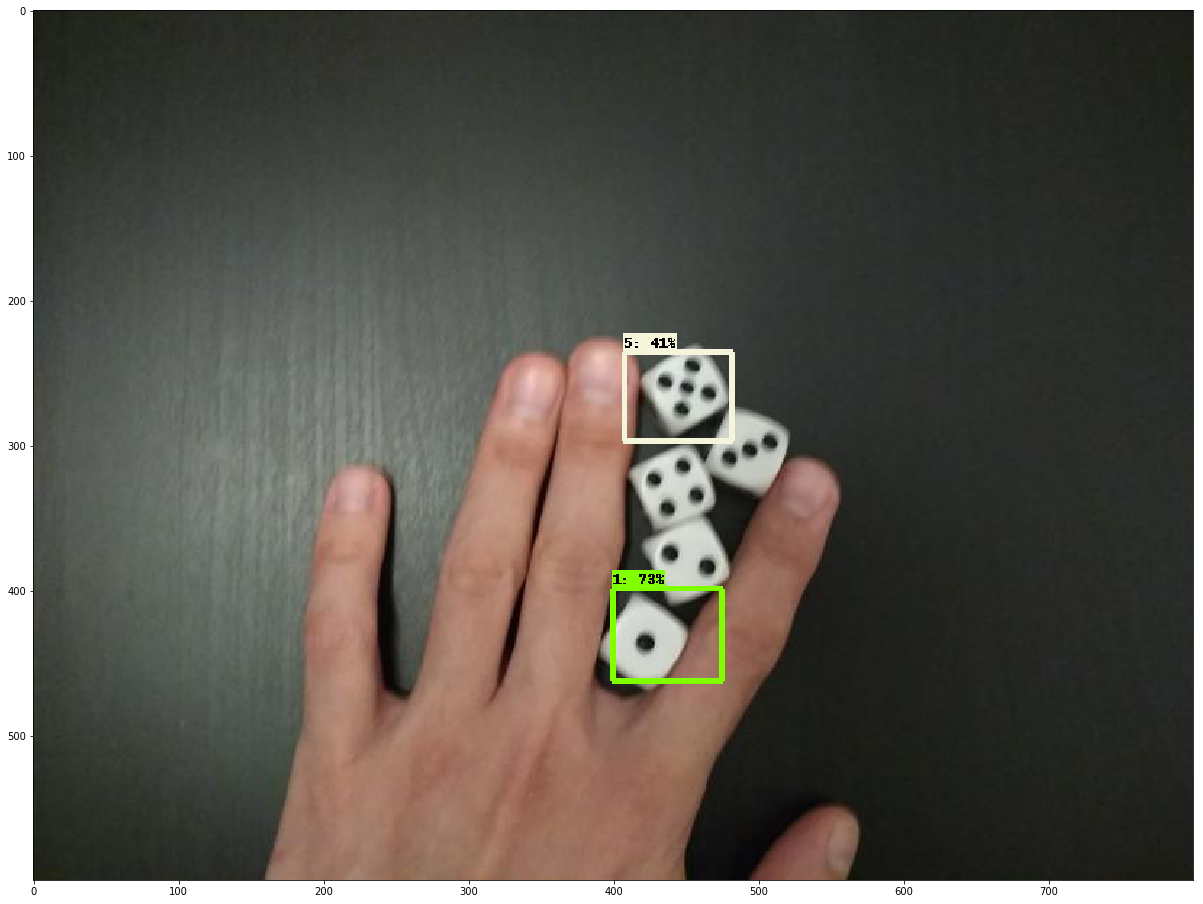

In [33]:
%matplotlib inline

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = "/content/training_demo/training/output_inference_graph_v1.pb/frozen_inference_graph.pb"

image_path = "/content/training_demo/images/test/5.jpg"

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = "/content/training_demo/annotations/label_map.pbtxt"

# Number of classes to detect
NUM_CLASSES = 6

# Load a (frozen) Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


# Loading label map
# Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


# Helper code
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Detection
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:

      image_np = load_image_into_numpy_array(Image.open(image_path))
    
      image_np_expanded = np.expand_dims(image_np, axis=0)
      # Extract image tensor
      image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
      # Extract detection boxes
      boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
      # Extract detection scores
      scores = detection_graph.get_tensor_by_name('detection_scores:0')
      # Extract detection classes
      classes = detection_graph.get_tensor_by_name('detection_classes:0')
      # Extract number of detectionsd
      num_detections = detection_graph.get_tensor_by_name(
          'num_detections:0')
      # Actual detection.
      (boxes, scores, classes, num_detections) = sess.run(
          [boxes, scores, classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      # Visualization of the results of a detection.
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=4,
          min_score_thresh = 0.4
          )
     
      IMAGE_SIZE = (24, 16)
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)  